In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from time import time
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.optimize import minimize
from scipy.optimize import curve_fit

# import cupy as cp

In [33]:
0.2 * 1e6 == 2e5

True

In [40]:
t_min = 0
t_end = 24 * 6

k_DNA = 0.00001
k_s = 3e-3
k_dRNA = 3e-2
K_RNA = 2e6


X0 = 2e5  # Xの初期値を適切に設定してください
DNA0 = 2.0 * 1e11 / X0 * 0.8
RNA0 = 0.0  # Okumura

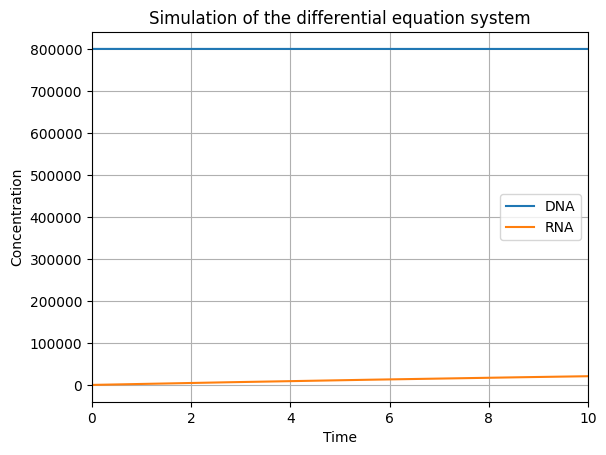

In [41]:
# 微分方程式系の定義
def model(t, y):
    DNA, RNA = y
    dDNAdt = -k_DNA * DNA
    dRNAdt = k_s * DNA - k_dRNA * RNA
    
    return [dDNAdt, dRNAdt]

# solve_ivpを使用して微分方程式系を解く
sol_rna = solve_ivp(model, [t_min, t_end], [DNA0, RNA0], t_eval=np.linspace(t_min, t_end, 1000))

# 結果のプロット
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(sol_rna.t, sol_rna.y[0], label='DNA')
ax.plot(sol_rna.t, sol_rna.y[1], label='RNA')
ax.set_xlabel('Time')
ax.set_ylabel('Concentration')
ax.set_xlim(0, 10)
ax.set_title('Simulation of the differential equation system')
ax.legend()
ax.grid(True)
fig.show()

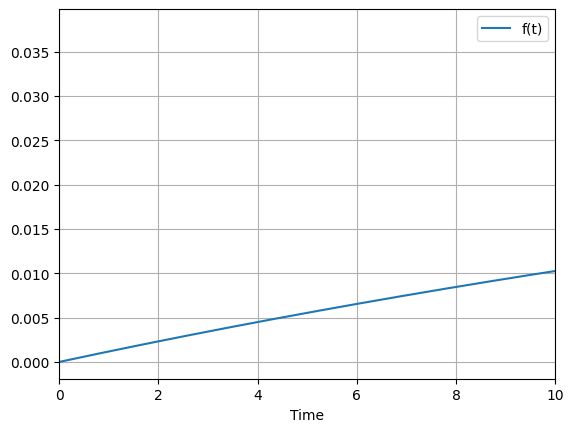

In [42]:
f = sol_rna.y[1] / (sol_rna.y[1] + K_RNA)

# 結果のプロット
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(sol_rna.t, f, label='f(t)')
ax.set_xlabel('Time')
ax.set_xlim(0, 10)

ax.legend()
ax.grid(True)
fig.show()